In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('data1.csv', index_col='id')
df.drop('index', axis=1, inplace=True)
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
id,,,,,,,,,,,,
170287232,2,3,0,1,2,2,1,2,2,1,1,1
171738755,5,4,1,4,2,3,3,0,4,3,2,1
123082919,3,3,2,0,1,3,3,2,2,2,1,2
122846297,3,5,2,2,3,2,4,2,5,4,3,1
123039223,4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
121722659,5,5,0,4,3,5,4,4,2,2,3,4
122771403,4,1,3,3,4,3,3,4,5,3,2,1
193988203,3,3,3,3,3,3,4,3,5,3,3,3


In [3]:
scaler = MinMaxScaler()
scaled_answers = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

pca = PCA()
selected_features = pca.fit_transform(scaled_answers.values)

In [4]:
scaled_answers

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
id,,,,,,,,,,,,
170287232,0.333333,0.6,0.0,0.2,0.4,0.4,0.2,0.4,0.4,0.2,0.2,0.25
171738755,0.833333,0.8,0.2,0.8,0.4,0.6,0.6,0.0,0.8,0.6,0.4,0.25
123082919,0.500000,0.6,0.4,0.0,0.2,0.6,0.6,0.4,0.4,0.4,0.2,0.50
122846297,0.500000,1.0,0.4,0.4,0.6,0.4,0.8,0.4,1.0,0.8,0.6,0.25
123039223,0.666667,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
121722659,0.833333,1.0,0.0,0.8,0.6,1.0,0.8,0.8,0.4,0.4,0.6,1.00
122771403,0.666667,0.2,0.6,0.6,0.8,0.6,0.6,0.8,1.0,0.6,0.4,0.25
193988203,0.500000,0.6,0.6,0.6,0.6,0.6,0.8,0.6,1.0,0.6,0.6,0.75


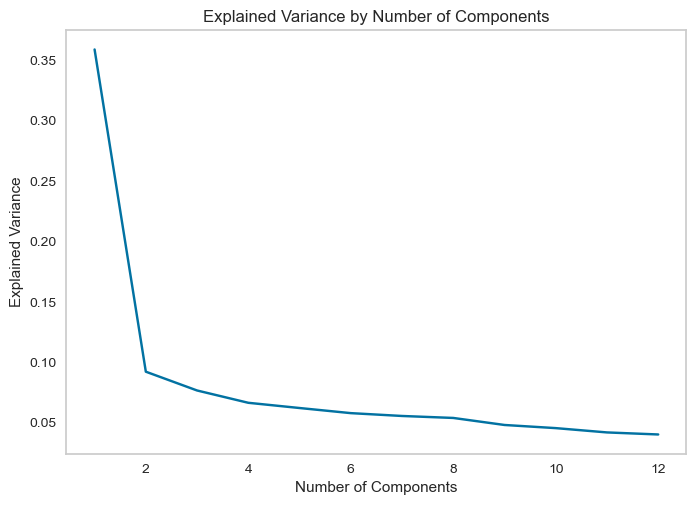

Number of components required to retain 95% of variance: 11


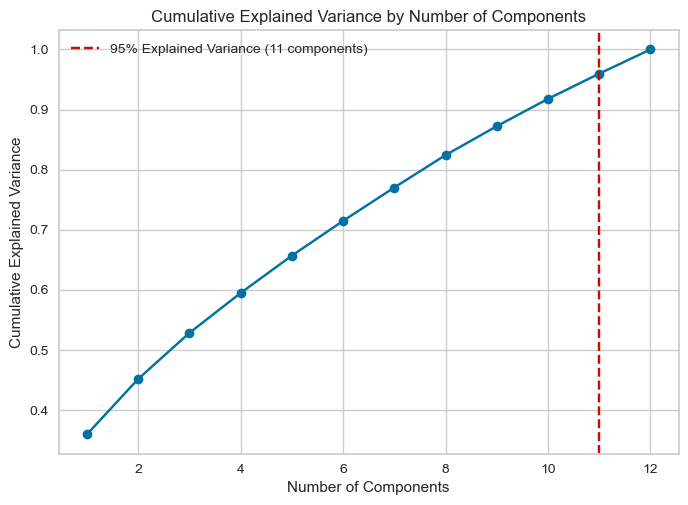

In [5]:
n_components = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0] + 1

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid()
plt.show()

print(f"Number of components required to retain 95% of variance: {n_components}")

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'95% Explained Variance ({n_components} components)')
plt.legend()
plt.show()

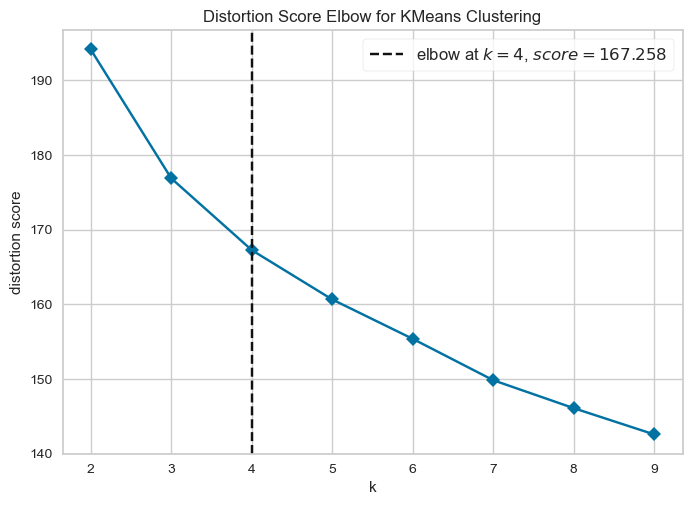

In [6]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10), timings= False)
visualizer.fit(selected_features)
visualizer.show()
k_n1 = visualizer.elbow_value_

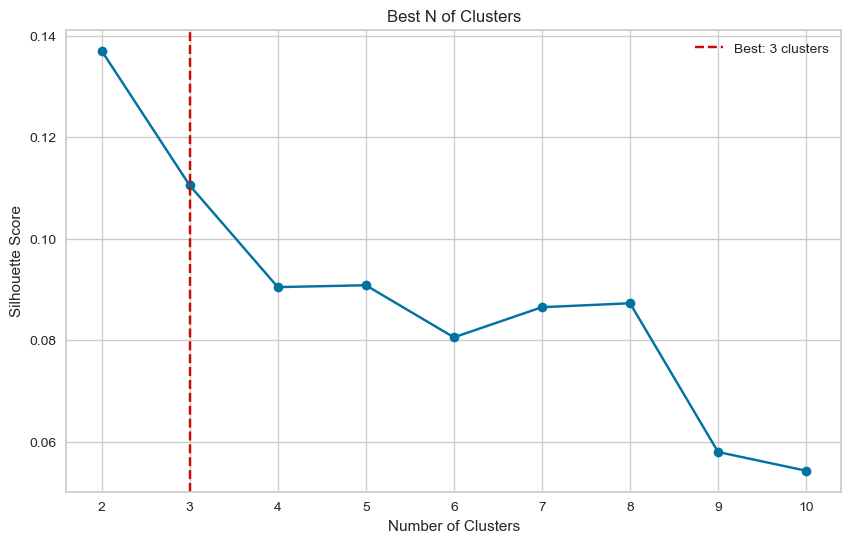

In [7]:
max_clusters = 10
min_clusters = 3
max_silhouette_score = float('-inf')
best_n_clusters = None

silhouette_scores = []
for n_clusters in range(2, max_clusters + 1):
    
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(selected_features)
    score = silhouette_score(selected_features, labels)
    silhouette_scores.append(score)

    if n_clusters >= min_clusters and score > max_silhouette_score:
        max_silhouette_score = score
        best_n_clusters = n_clusters

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Best N of Clusters')

if best_n_clusters:
    plt.axvline(x=best_n_clusters, color='r', linestyle='--', label=f'Best: {best_n_clusters} clusters')

plt.legend()
plt.show()

In [8]:
clustering_methods = [
    KMeans(n_clusters=k_n1),
    AgglomerativeClustering(n_clusters=best_n_clusters),
]

method_names = [
    'KMeans',
    'Agglomerative',
]

silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

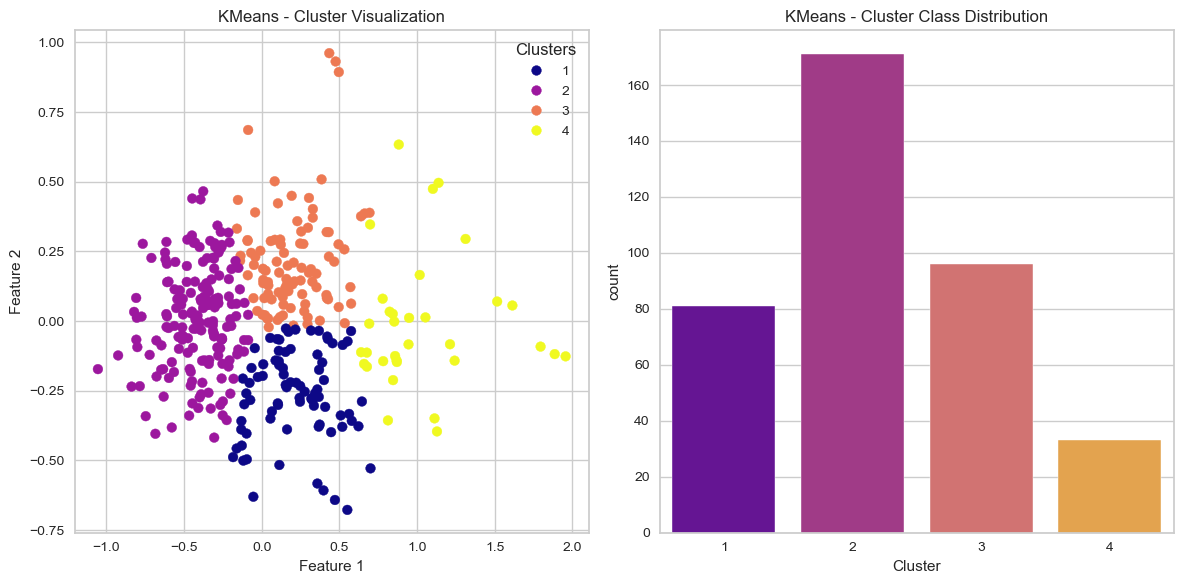

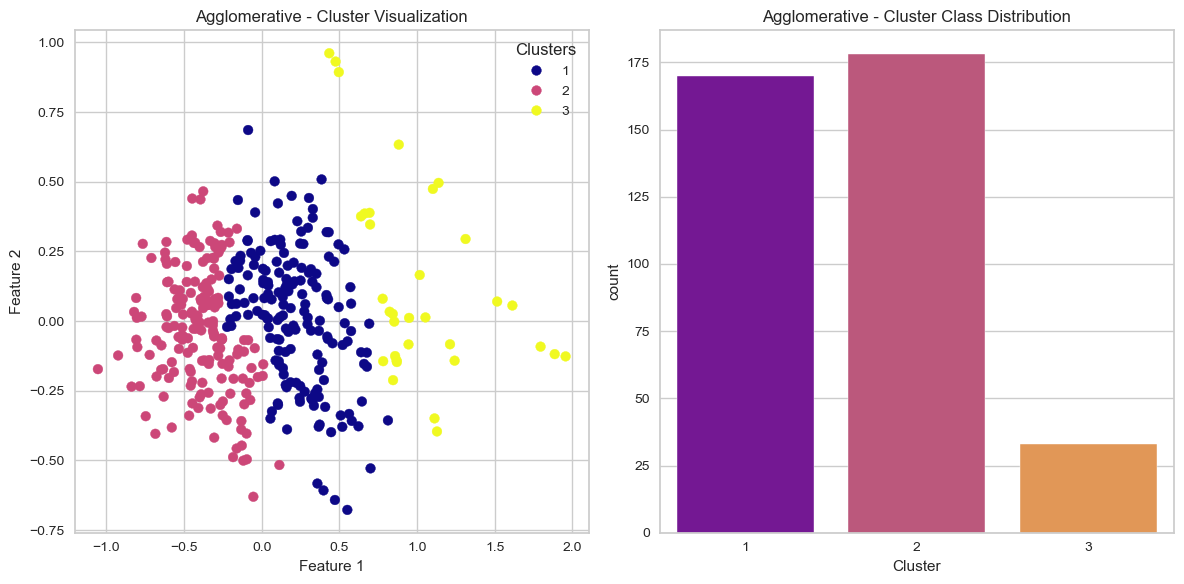

In [9]:
for i, method in enumerate(clustering_methods):

    pca = PCA(n_components=2)
    X =  pca.fit_transform(selected_features)
    
    cluster_labels = method.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))
    calinski_scores.append(calinski_harabasz_score(X, cluster_labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, cluster_labels))

    if method_names[i] == 'KMeans':
        df['KMeans_labels'] = cluster_labels
    elif method_names[i] == 'Agglomerative':
        df['Agglomerative_labels'] = cluster_labels

    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(121)
    scatter = ax1.scatter(X[:, 0], X[:, 1],
                          c=cluster_labels+1, cmap='plasma')
    ax1.set_title(f'{method_names[i]} - Cluster Visualization')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.legend(*scatter.legend_elements(), title='Clusters')
    
    ax2 = fig.add_subplot(122)
    sns.countplot(x=cluster_labels+1, width=0.8, palette='plasma')
    ax2.set_title(f'{method_names[i]} - Cluster Class Distribution')
    ax2.set_xlabel('Cluster')
    # ax2.set_ylabel('Count')

    plt.tight_layout()
    plt.savefig(f'img/real_data/{method_names[i]}_clusters.png', dpi=300)
    plt.show()

silhouette_scores = [f"{score:.4f}" for score in silhouette_scores]
calinski_scores = [f"{score:.4f}" for score in calinski_scores]
davies_bouldin_scores = [f"{score:.4f}" for score in davies_bouldin_scores]


evaluation_df = pd.DataFrame({
    'Method': method_names,
    'Silhouette Score': silhouette_scores,
    'Calinski-Harabasz Score': calinski_scores,
    'Davies-Bouldin Score': davies_bouldin_scores
})

In [10]:
evaluation_df

,Method,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
0,KMeans,0.3992,333.0206,0.8691
1,Agglomerative,0.3802,307.6809,0.9190


In [11]:
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,KMeans_labels,Agglomerative_labels
id,,,,,,,,,,,,,,
170287232,2,3,0,1,2,2,1,2,2,1,1,1,3,2
171738755,5,4,1,4,2,3,3,0,4,3,2,1,2,0
123082919,3,3,2,0,1,3,3,2,2,2,1,2,0,0
122846297,3,5,2,2,3,2,4,2,5,4,3,1,0,1
123039223,4,1,0,0,0,0,0,0,0,0,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121722659,5,5,0,4,3,5,4,4,2,2,3,4,1,1
122771403,4,1,3,3,4,3,3,4,5,3,2,1,2,0
193988203,3,3,3,3,3,3,4,3,5,3,3,3,1,1


In [12]:
scdf = df.iloc[:, :-2]
scaled = pd.DataFrame(scaler.fit_transform(scdf), columns=scdf.columns, index=scdf.index)
scaled['KMeans_labels'] = df['KMeans_labels']
scgk = scaled.groupby('KMeans_labels').mean()
scaled.drop('KMeans_labels', axis=1, inplace=True)
scaled['Agglomerative_labels'] = df['Agglomerative_labels']
scga = scaled.groupby('Agglomerative_labels').mean()

In [13]:
def normalize_values(values):
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized_values = scaler.fit_transform(values.flatten().reshape(-1, 1))

    return normalized_values.reshape(values.shape)

def generate_cluster_heatmaps(df, method, save_filename=None):

    section_numbers = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12']

    if method == 'KMeans':
        gd = scgk
    elif method == 'Agglomerative':
        gd = scga

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(gd, cmap='plasma', annot=True, fmt=".2f", linewidths=0.5)
    plt.title(f'Cluster Labels Correlation with Section Results - {method.capitalize()}', fontsize=16)
    plt.xlabel('Section Numbers')
    plt.ylabel('Cluster Labels')

    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va="center")
    ax.set_yticklabels([str(int(label.get_text()) + 1) for label in ax.get_yticklabels()])

    plt.tight_layout()
    if save_filename:
        plt.savefig(save_filename, dpi=400)
    plt.show()

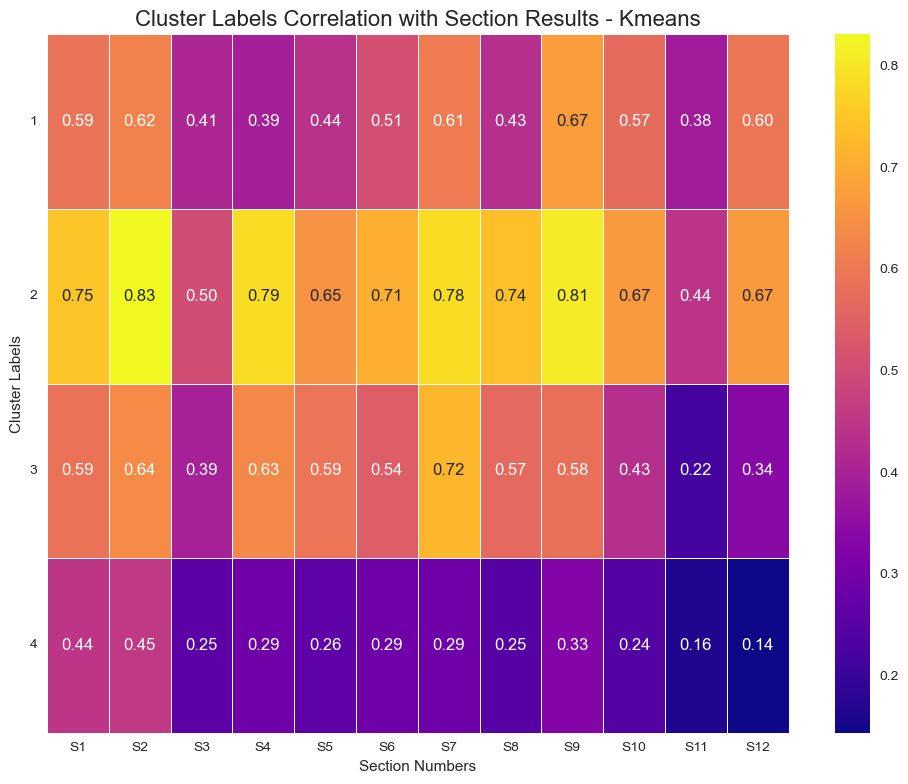

In [14]:
generate_cluster_heatmaps(df, method='KMeans', save_filename='img/real_data/k_heatmap.png')

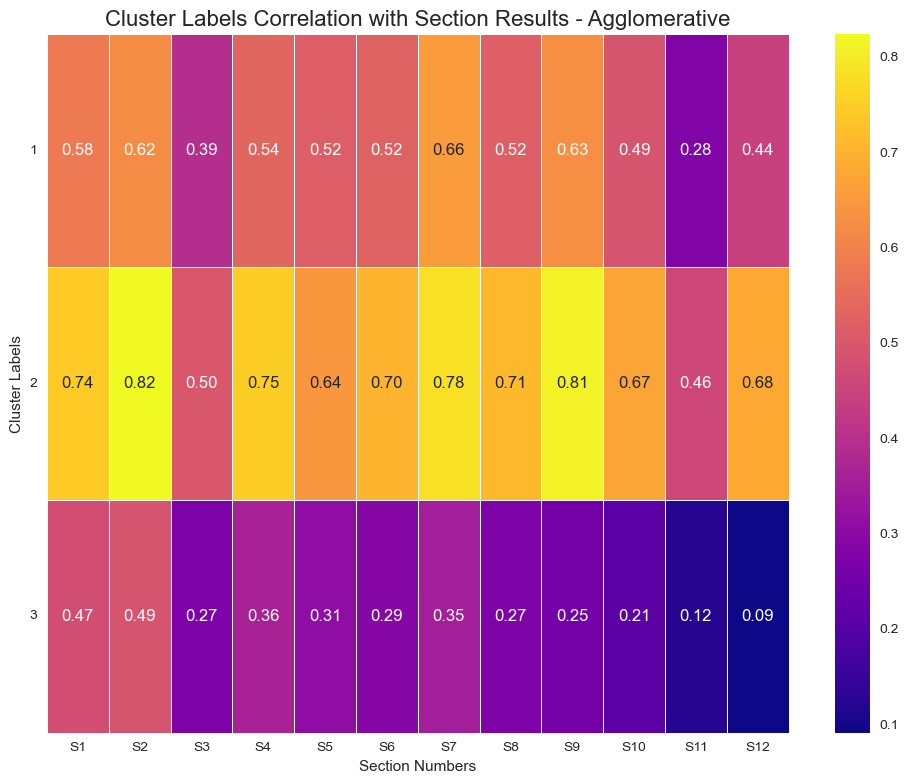

In [15]:
generate_cluster_heatmaps(df, method='Agglomerative', save_filename='img/real_data/agg_heatmap.png')